In [ ]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git


Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 268 (delta 150), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (268/268), 274.11 KiB | 7.03 MiB/s, done.
Resolving deltas: 100% (150/150), done.


In [ ]:
import pandas as pd
import networkx as nx
from algorithmic_complexity.aclib import graphstuff as gs
import numpy as np
import heapq as hq 
import math


In [ ]:
url='https://raw.githubusercontent.com/draul99/traveling_data/main/data.csv'

In [ ]:
def haversine(cp1, cp2):
  la1, lo1 = float(cp1['LATITUD']), float(cp1['LONGITUD'])
  la2, lo2 = float(cp2['LATITUD']), float(cp2['LONGITUD'])
  
  lo1, la1, lo2, la2 = map(math.radians, [lo1, la1, lo2, la2])
  dlo = lo2 - lo1
  dla = la2 - la1
  a = math.sin(dla/2)**2 + math.cos(la1) * math.cos(la2) * math.sin(dlo/2)**2
  c = 2 * math.asin(math.sqrt(a))
  r = 6371

  return round(c * r, 2)

In [ ]:
df=pd.read_csv(url) #lectura de nuestro archivo de datos al que llamamos df
pd.set_option('display.max_rows',None) #El None es para desplegar todos los datos.
df

,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,NMI1,NMI2
0,AMAZONAS,BAGUA,ARAMANGO,EL MUYO (C.P.L.),-5.422545,-78.45299,311,1206
1,AMAZONAS,BAGUA,ARAMANGO,RESERVA UJUCANO,-5.427565,-78.444372,44,129
2,AMAZONAS,BAGUA,ARAMANGO,TUTUMBEROS,-5.327317,-78.44472,49,179
3,AMAZONAS,BAGUA,BAGUA,ALENYA BAJO,-5.682439,-78.495229,3,8
4,AMAZONAS,BONGARA,CUISPES,MITOPAMPA,-5.93856,-77.965302,1,4
5,AMAZONAS,BONGARA,JAZAN,NUEVA ESPERANZA,-5.935482,-77.976755,4,15
6,AMAZONAS,BONGARA,JAZAN,PEDRO RUIZ GALLO,-5.941387,-77.977098,1365,5361
7,AMAZONAS,BONGARA,JAZAN,PEDRO RUIZ,-5.94069,-77.97635,2,7
8,AMAZONAS,BONGARA,JAZAN,SAN JERONIMO,-5.95036,-77.97886,3,6
9,AMAZONAS,BONGARA,JAZAN,SANTA ROSA,-5.932149,-77.972108,1,5


In [ ]:
nomprovincias = df['PROVINCIA'].unique() #Obtenemos todas las provincias disponibles
print('Podemos encontrar un total de',len(nomprovincias),'provincias')
print(nomprovincias)


Podemos encontrar un total de 157 provincias
['BAGUA' 'BONGARA' 'CHACHAPOYAS' 'UTCUBAMBA' 'ANTONIO RAYMONDI'
 'BOLOGNESI' 'CARHUAZ' 'CASMA' 'HUARAZ' 'HUARI' 'HUAYLAS' 'OCROS'
 'POMABAMBA' 'RECUAY' 'SANTA' 'SIHUAS' 'YUNGAY' 'ABANCAY' 'ANDAHUAYLAS'
 'ANTABAMBA' 'AYMARAES' 'CHINCHEROS' 'GRAU' 'AREQUIPA' 'CAMANA' 'CARAVELI'
 'CASTILLA' 'CAYLLOMA' 'CONDESUYOS' 'CANGALLO' 'HUAMANGA' 'HUANCA SANCOS'
 'HUANTA' 'LUCANAS' 'PARINACOCHAS' 'VICTOR FAJARDO' 'CAJABAMBA'
 'CAJAMARCA' 'CELENDIN' 'CHOTA' 'CONTUMAZA' 'CUTERVO' 'JAEN' 'SAN IGNACIO'
 'SAN MARCOS' 'SAN MIGUEL' 'SAN MIMGUEL' 'SANTA CRUZ' 'ACOMAYO' 'CALCA'
 'CANAS' 'CANCHIS' 'CHUMBIVILCAS' 'LA CONVENCION' 'PARURO' 'QUISPICANCHI'
 'PROVINCIA' 'CASTROVIRREYNA' 'CHURCAMPA' 'HUANCAVELICA' 'HUAYTARA'
 'TAYACAJA' 'AMBO' 'DOS DE MAYO' 'DOSDEMAYO' 'HUAMALIES' 'HUANUCO SANTA'
 'HUANUCO' 'LAURICOCHA' 'LEONCIO PRADO' 'MARAÑON' 'PUERTO INCA' 'CHINCHA'
 'ICA' 'NASCA' 'PALPA' 'PISCO' 'CHANCHAMAYO' 'CHUPACA' 'CONCEPCION'
 'HUANCAYO' 'JAUJA' 'JUNIN' 'SATIPO'

In [ ]:
provincias = dict()
print('Cantidad de centros poblados que hay en cada provincia\n')
for nom in nomprovincias:
  provincias[nom] = df[df['PROVINCIA'] == nom]
  print(nom, len(provincias[nom]))

  

Cantidad de centros poblados que hay en cada provincia

BAGUA 4
BONGARA 8
CHACHAPOYAS 1
UTCUBAMBA 12
ANTONIO RAYMONDI 2
BOLOGNESI 5
CARHUAZ 20
CASMA 14
HUARAZ 38
HUARI 20
HUAYLAS 5
OCROS 2
POMABAMBA 21
RECUAY 28
SANTA 22
SIHUAS 6
YUNGAY 7
ABANCAY 41
ANDAHUAYLAS 8
ANTABAMBA 2
AYMARAES 23
CHINCHEROS 12
GRAU 1
AREQUIPA 24
CAMANA 16
CARAVELI 16
CASTILLA 1
CAYLLOMA 20
CONDESUYOS 3
CANGALLO 20
HUAMANGA 3
HUANCA SANCOS 38
HUANTA 7
LUCANAS 92
PARINACOCHAS 1
VICTOR FAJARDO 29
CAJABAMBA 10
CAJAMARCA 13
CELENDIN 16
CHOTA 6
CONTUMAZA 16
CUTERVO 6
JAEN 11
SAN IGNACIO 2
SAN MARCOS 2
SAN MIGUEL 13
SAN MIMGUEL 1
SANTA CRUZ 1
ACOMAYO 14
CALCA 3
CANAS 4
CANCHIS 12
CHUMBIVILCAS 3
LA CONVENCION 13
PARURO 14
QUISPICANCHI 22
PROVINCIA 1
CASTROVIRREYNA 49
CHURCAMPA 1
HUANCAVELICA 6
HUAYTARA 32
TAYACAJA 1
AMBO 37
DOS DE MAYO 7
DOSDEMAYO 1
HUAMALIES 6
HUANUCO SANTA 1
HUANUCO 27
LAURICOCHA 11
LEONCIO PRADO 28
MARAÑON 12
PUERTO INCA 9
CHINCHA 1
ICA 60
NASCA 6
PALPA 30
PISCO 14
CHANCHAMAYO 14
CHUPACA 13
CONCEPCIO

SELECCIÓN DE PROVINCIA

In [ ]:
#@title Provincia 
#@markdown Ingrese la provincia

no_type_checking = ''
nom_prov = 'BONGARA' #@param {type:"string"}

In [ ]:
nomdistritos = provincias[nom_prov]['DISTRITO'].unique()
print('Los distritos pertenecientes a la provincia de',nom_prov, 'son los siguientes',len(nomdistritos))
print(nomdistritos)

Los distritos pertenecientes a la provincia de BONGARA son los siguientes 2
['CUISPES' 'JAZAN']


In [ ]:
distritos=dict() #Cantidad de centros poblados por distrito
for nom in nomdistritos:
  distritos[nom]=provincias[nom_prov][provincias[nom_prov]['DISTRITO']==nom]
  print(nom,len(distritos[nom]))

CUISPES 1
JAZAN 7


CENTROS POBLADOS DE 1 DISTRITO EN ESPECÍFICO

In [ ]:
#@title Distrito 
#@markdown Ingrese el distrito

no_type_checking = ''
nom_dist = 'JAZAN' #@param {type:"string"}

In [ ]:
distrito = distritos[nom_dist]
G = nx.Graph()
col = 'CENTRO POBLADO'
index = distrito.index[0]
for i, cp1 in distrito.iterrows():
    G.add_node(i-index, label=cp1[col])
for i, cp1 in distrito.iterrows():
    for j, cp2 in distrito.iterrows():
        if cp1[col] != cp2[col]: #and dist(cp1, cp2) < 0.006:
            G.add_edge(i-index, j-index, weight=haversine(cp1, cp2))

#print(ind1, ind2)

GRÁFICO DE LOS CENTROS POBLADOS EN 1 DISTRITO CON SU RESPECTIVO LABEL

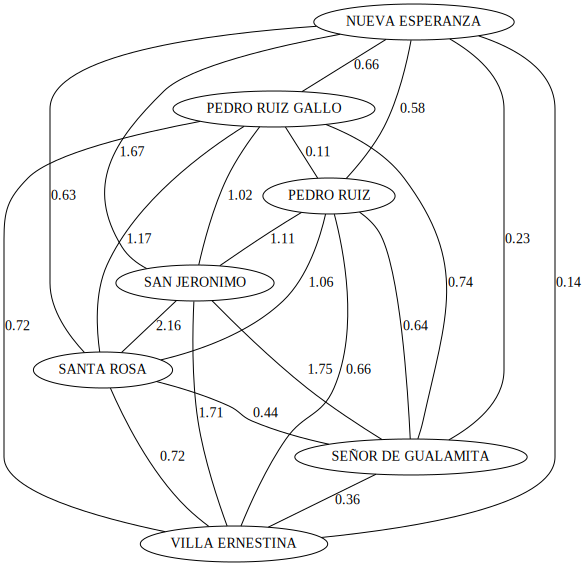

In [ ]:
gs.nx2gv(G, nodeinfo = True, weighted=True, params={'size':'20'})

1.   DIJKSTRA

In [ ]:
def dijkstra(G, s):
  for u in G.nodes:
    G.nodes[u]['visited'] = False             #Inicializamos los nodos como no visitados
    G.nodes[u]['path']    = -1                #Asignamos a los predecesores como desconocidos
    G.nodes[u]['cost']    = math.inf          #Asignamos como infinito al costo para llegar a cada vertice
    
  G.nodes[s]['cost'] = 0                      #Inicializamos el costo del vertice source como 0
  q = [(0, s)]                                #Agregamos el vertice source a la cola de prioridad teniendo en cuenta el costo
  while q:
    g_u, u = hq.heappop(q)                    #Retiramos un elemento de la cola y obtenemos el peso del vertice y el vertice
    if not G.nodes[u]['visited']:             #De no haber sido visitado el vertice lo marcamos como tal
      G.nodes[u]['visited'] = True
      for v in G.neighbors(u):                #Para cada vecino del vertice u
        if not G.nodes[v]['visited']:         #Si el vertice v no ha sido visitado 
          w_uv = G.edges[u, v]['weight']      #Recuperamos el peso de la arista u_v
          f_v  = g_u + w_uv                   #Calculamos el costo de llegar a v a traves de u
          g_v  = G.nodes[v]['cost']           #Recuperamos del grafo el costo actual para llegar a v
          if f_v < g_v:                       #Si la nueva distancia es menor a la distancia conocida hemos encontrado un camino mas rapido
            G.nodes[v]['cost'] = f_v          #Actualizamos el nodo vecino con el nuevo costo 
            G.nodes[v]['path'] = u            #Consideramos el antecesor de v como u
            hq.heappush(q, (f_v, v))          #Agregamos v con su nuevo costo a la cola de prioridad
 
 
  path = [0]*G.number_of_nodes()              #Extraemos el path de todos los vertices y lo almacenamos en un arreglo
  for v, info in G.nodes.data():
    path[v] = info['path']

  return path

PATH CON DIJKSTRA

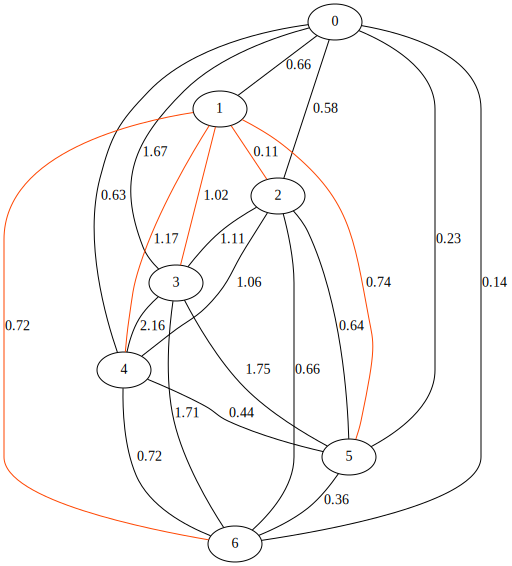

In [ ]:
path = dijkstra(G, 1)
gs.nx2gv(G, path=path, weighted=True, params={'size':'20'})

2.   DFS

In [ ]:
def _dfs(G, u, cam, sig):
    min = math.inf
    if not G.nodes[u]['visited']:
        G.nodes[u]['visited'] = True
        cam.append(u)
        for v in G.neighbors(u):
            for edge in G.edges(u):
                if v == edge[1] and G.edges[u, v]['weight'] < min and not G.nodes[v]['visited']:
                    min = G.edges[u, v]['weight']
                    sig = v  
        G.nodes[sig]['π'] = u
        _dfs(G, sig, cam, sig)
            


def dfs(G, s):
    camino = []
    sig = s
    for u in G.nodes:
        G.nodes[u]['visited'] = False
        G.nodes[u]['π'] = -1
    _dfs(G, s, camino, sig)
    print(f"El camino es el siguiente {camino}")


PATH CON DFS

El camino es el siguiente [1, 2, 0, 6, 5, 4, 3]


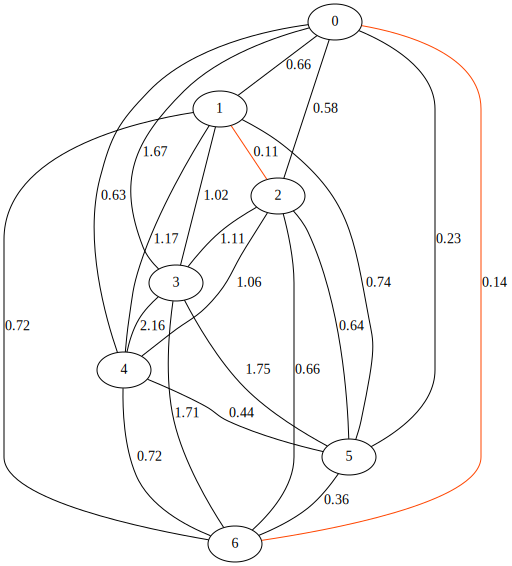

In [ ]:
dfs(G,1)
path = [0]*G.number_of_nodes()
for v, info in G.nodes.data():
  path[v] = info['π']
gs.nx2gv(G, path=path, weighted=True, params={'size':'20'})

3.   BFS


In [ ]:
def menor(G,s):
  z = []
  for i in G.neighbors(s):
    x = G.edges[s,i]['weight']
    z.append(x)
    z.sort()
  return min(z)
def bfscamino(G, s):
  P = G.copy()
  H = G.copy()
  queue = [s]
  camino = [s]
  costo = []
  for u in P.nodes:
    P.nodes[u]['visited'] = False
    P.nodes[u]['π'] = -1
  P.nodes[s]['visited'] = True
  while queue:
    s = camino[0]
    u = queue[0]
    for v in P.neighbors(u):
      if not P.nodes[v]['visited'] and H.edges[s,v]['weight'] == menor(H,s):
        costo.append(menor(H,s))
        P.nodes[v]['visited'] = True
        P.nodes[v]['π'] = u
        camino.append(v)
        queue.append(v)
    if len(H) >= 2:
       H.remove_node(queue[1])
    del queue[0]
  costototal = sum(costo)
  return camino,costototal
def bfs(G,s):
  queue = [s]
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['π'] = -1
  G.nodes[s]['visited'] = True
  while queue:
    u = queue[0]

    for v in G.neighbors(u):
      if not G.nodes[v]['visited']:
        G.nodes[v]['visited'] = True
        G.nodes[v]['π'] = u
        queue.append(v)

    del queue[0]
    

def bfstotal(G,s):
  x = bfscamino(G,s)[0]
  y = bfscamino(G,s)[1]
  bfs(G,s)
  print("El camino es:", x)
  print("El costo por el camino es:",y)

PATH CON BFS

El camino es: [0, 6, 5, 2, 4, 1, 3]
El costo por el camino es: 3.91


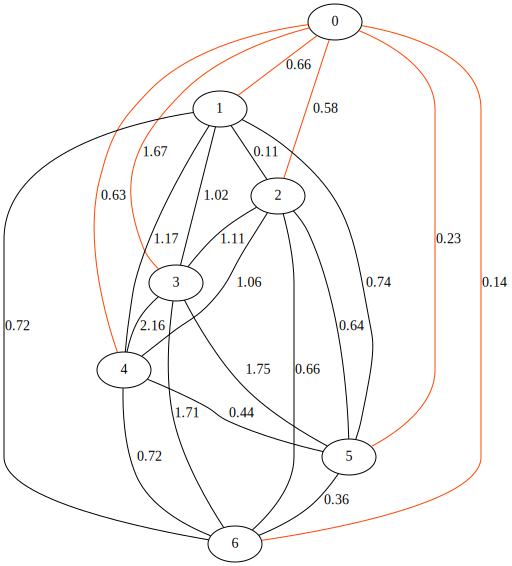

In [ ]:
bfstotal(G,0)
path = [0]*G.number_of_nodes()
for v, info in G.nodes.data():
  path[int(v)] = int(info['π'])
#print(path)
#gs.path2gv(path)
gs.nx2gv(G, path=path, weighted=True, params={'size':'20'})

4. BRUTEFORCE

In [ ]:
def menor(G,s):
  z = []
  for i in G.neighbors(s):
    x = G.edges[s,i]['weight']
    z.append(x)
    z.sort()
  return min(z)
  
def bruteforce(G, s):
  P = nx.Graph(G)
  L = nx.Graph(G)
  x = []
  queue = [s]
  camino = [s]
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['path'] = -1
  G.nodes[s]['visited'] = True
  while queue:
    u = queue[0]
    for v in G.neighbors(u):
      if not G.nodes[v]['visited'] and L.edges[u,v]['weight'] == menor(L,u):
        x.append(menor(L,u))
        G.nodes[v]['visited'] = True
        G.nodes[v]['path'] = u
        camino.append(v)
        queue.append(v)
    L.remove_node(queue[0])
    del queue[0]
  costo =sum(x)
  return camino, costo

PATH CON BRUTEFORCE

In [ ]:
road = bruteforce(G,0)[0]
cost = bruteforce(G,0)[1]
print("El camino a seguir es: ",road)
print("El costo por este camino es: ",cost)

El camino a seguir es:  [0, 6, 5, 4, 2, 1, 3]
El costo por este camino es:  3.13


In [ ]:
path = [0]*G.number_of_nodes()
for v, info in G.nodes.data():
  path[int(v)] = int(info['path'])
#print(path)
gs.path2gv(path)
#gs.nx2gv(G, path=path, weighted=True, params={'size':'20'})
#G.nodes.data()

In [ ]:
G.nodes.data()

NodeDataView({0: {'label': 'NUEVA ESPERANZA', 'visited': True, 'path': -1, 'cost': 0.66, 'π': -1}, 1: {'label': 'PEDRO RUIZ GALLO', 'visited': True, 'path': 2, 'cost': 0, 'π': 0}, 2: {'label': 'PEDRO RUIZ', 'visited': True, 'path': 4, 'cost': 0.11, 'π': 0}, 3: {'label': 'SAN JERONIMO', 'visited': True, 'path': 1, 'cost': 1.02, 'π': 0}, 4: {'label': 'SANTA ROSA', 'visited': True, 'path': 5, 'cost': 1.17, 'π': 0}, 5: {'label': 'SEÑOR DE GUALAMITA', 'visited': True, 'path': 6, 'cost': 0.74, 'π': 0}, 6: {'label': 'VILLA ERNESTINA', 'visited': True, 'path': 0, 'cost': 0.72, 'π': 0}})